## **_PRÁCTICA 10 - TAA_**
_Pablo Martín de Benito_

***

Utilizamos 'htop' para ver el rendimiento del portatil

In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import time
from tqdm import tqdm

In [2]:
# Descarga el dataset por ID
dataset = fetch_openml(data_id=1560)  

# Convierte los datos a un DataFrame de pandas
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

# Muestra las primeras filas del DataFrame
print(df.head())
print(df.shape)

     V1     V2      V3     V4     V5   V6   V7   V8    V9  V10  ...  V27  V28  \
0  23.0  240.0   357.0  120.0  120.0  0.0  0.0  0.0  73.0  0.5  ...  0.0  0.0   
1  45.0    5.0   632.0  132.0  132.0  4.0  0.0  4.0  17.0  2.1  ...  0.0  0.0   
2  45.0  177.0   779.0  133.0  133.0  2.0  0.0  5.0  16.0  2.1  ...  0.0  0.0   
3  45.0  411.0  1192.0  134.0  134.0  2.0  0.0  6.0  16.0  2.4  ...  0.0  0.0   
4  45.0  533.0  1147.0  132.0  132.0  4.0  0.0  5.0  16.0  2.4  ...  1.0  0.0   

   V29  V30  V31  V32  V33  V34  V35  target  
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0       2  
1  0.0  0.0  1.0  0.0  0.0  0.0  0.0       1  
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0       1  
3  0.0  0.0  1.0  0.0  0.0  0.0  0.0       1  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0       1  

[5 rows x 36 columns]
(2126, 36)


/home/pablo/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X = df.copy()
X.drop(columns=['target'], inplace=True)
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

y = df['target']
y_array = np.array(y)

In [4]:
resul = pd.DataFrame(index=range(5,51,5), columns = ('Entrena', 'Verifica','T_Ejecución'))
resul.index_name = "Tamaño"
resul

,Entrena,Verifica,T_Ejecución
5,NaN,NaN,NaN
10,NaN,NaN,NaN
15,NaN,NaN,NaN
20,NaN,NaN,NaN
25,NaN,NaN,NaN
30,NaN,NaN,NaN
35,NaN,NaN,NaN
40,NaN,NaN,NaN
45,NaN,NaN,NaN
50,NaN,NaN,NaN


In [5]:
K = 10
kf = KFold(n_splits=K)

In [6]:
tamaños = np.arange(5,51,5)
for tam in tamaños:
    r_clf = pd.DataFrame(columns=['Entrena','Verifica','T. Ejecución'])
    k = 0
    for train_index, test_index in tqdm(kf.split(X),total = kf.get_n_splits(X)):
        start_time = time.time()

        clf = MLPClassifier(hidden_layer_sizes=tam, max_iter=2000)
        X_train = X[train_index,:]
        y_train = y[train_index]
        X_test = X[test_index,:]
        y_test = y[test_index]

        clf.fit(X_train, y_train)
        entrena = clf.score(X_train, y_train)
        verifica = clf.score(X_test, y_test)

        end_time = time.time()
        ejecucion = end_time - start_time

        r_clf.loc[k,:] = [entrena,verifica,ejecucion]

        k += 1
    r_clf.index.name = "Fold"

    print("\nMEDIA:")
    print(r_clf)
    mEntrena = np.mean(r_clf['Entrena'])
    mVerifica = np.mean(r_clf['Verifica'])
    mTiempo = np.mean(r_clf['T. Ejecución'])
    print("\nTiempo Total (seg) = ", r_clf['T. Ejecución'].sum(),"\n")
    print(mEntrena)

    resul.loc[tam,:] = [mEntrena,mVerifica,mTiempo]

100%|██████████| 10/10 [00:05<00:00,  1.97it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.992159  0.957746     0.434261
1     0.994773   0.99061     1.136109
2     0.992159  0.971831     0.454126
3     0.991113  0.985915     0.386375
4     0.990591       1.0     0.436329
5     0.991113       1.0     0.600145
6     0.992685  0.990566     0.397036
7     0.991641  0.995283     0.335298
8     0.991641       1.0     0.498521
9     0.992163  0.990566     0.378011

Tiempo Total (seg) =  5.056211471557617 

0.992003756948689


100%|██████████| 10/10 [00:04<00:00,  2.37it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.993727  0.957746     0.386238
1     0.991113   0.99061     0.506585
2     0.991113  0.971831     0.353057
3     0.991636   0.99061     0.489365
4     0.991113       1.0     0.447597
5     0.991113       1.0     0.380751
6     0.992163  0.990566     0.456669
7     0.992163  0.990566     0.329259
8     0.991641       1.0      0.40859
9     0.992163  0.976415     0.446583

Tiempo Total (seg) =  4.2046942710876465 

0.9917946612874241


100%|██████████| 10/10 [00:05<00:00,  1.82it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.995295  0.962441     0.513223
1     0.992682   0.99061      0.56038
2     0.992682  0.971831     0.434295
3     0.993727  0.985915     0.659419
4     0.993204  0.995305     0.815647
5     0.992682       1.0     0.528085
6     0.992163  0.990566     0.495293
7     0.992685  0.995283     0.358762
8     0.993208       1.0     0.728701
9     0.992163  0.966981     0.394113

Tiempo Total (seg) =  5.487917423248291 

0.9930491260096321


100%|██████████| 10/10 [00:04<00:00,  2.01it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.995818  0.962441     0.485699
1     0.992159   0.99061     0.468661
2     0.992682  0.971831     0.413621
3     0.993727   0.99061     0.506459
4     0.992159       1.0     0.483885
5     0.992682       1.0     0.500256
6     0.993208  0.990566     0.563385
7     0.992685  0.985849     0.639243
8     0.990596       1.0     0.382705
9     0.993208  0.966981     0.533433

Tiempo Total (seg) =  4.9773478507995605 

0.9928923315750289


100%|██████████| 10/10 [00:05<00:00,  1.72it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.996341  0.962441     0.553061
1     0.993204   0.99061     0.577764
2     0.992682  0.971831     0.509843
3     0.993727   0.99061     0.650682
4     0.992682  0.995305      0.53058
5     0.992159       1.0     0.663083
6     0.992685  0.990566     0.701898
7      0.99373  0.990566     0.560329
8     0.992685       1.0     0.495839
9     0.993208  0.971698     0.557807

Tiempo Total (seg) =  5.800885915756226 

0.9933103863408312


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.996341  0.962441     0.580789
1     0.993204   0.99061     0.705784
2     0.992682  0.976526      0.64821
3     0.993727  0.985915     0.798752
4     0.995295  0.995305     0.963311
5     0.992682       1.0     0.523192
6     0.992685  0.990566     0.527746
7     0.993208  0.990566     0.518579
8      0.99373       1.0     0.908162
9      0.99373  0.915094     0.741083

Tiempo Total (seg) =  6.915608167648315 

0.9937285230406705


100%|██████████| 10/10 [00:08<00:00,  1.12it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.997386  0.962441     0.537294
1     0.993204   0.99061     0.574178
2     0.994773   0.99061     0.949719
3     0.997386  0.985915      0.94712
4     0.996341  0.995305     1.261338
5      0.99425       1.0     0.845718
6     0.994775  0.976415     1.130245
7     0.996343  0.981132     1.250152
8     0.992685       1.0     0.559963
9     0.994775  0.919811      0.87053

Tiempo Total (seg) =  8.926257610321045 

0.9951919195560706


100%|██████████| 10/10 [00:07<00:00,  1.27it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.996864  0.962441     0.653989
1     0.995295   0.99061     0.938059
2     0.995818  0.985915     0.903641
3     0.993204  0.985915     0.625525
4     0.992682       1.0     0.696117
5     0.992682       1.0     0.583297
6     0.995298  0.962264     1.028888
7     0.994775  0.981132     1.013092
8     0.994253       1.0     0.934989
9     0.993208  0.962264     0.460387

Tiempo Total (seg) =  7.837984561920166 

0.9944078654490175


100%|██████████| 10/10 [00:09<00:00,  1.11it/s]



MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.996341  0.962441     0.607204
1     0.997386  0.985915     0.986287
2      0.99425  0.981221     0.729497
3     0.995818  0.985915     0.709123
4     0.992682  0.995305     0.654817
5     0.995295       1.0     1.011141
6     0.994775  0.981132     0.813264
7     0.994253  0.981132     0.697392
8     0.995298       1.0     1.707683
9     0.996343  0.924528     1.107727

Tiempo Total (seg) =  9.024135828018188 

0.9952440842260046


100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


MEDIA:
       Entrena  Verifica T. Ejecución
Fold                                 
0     0.997386  0.962441     0.534568
1     0.994773   0.99061     0.557089
2     0.997386  0.985915     1.273027
3     0.995818   0.99061      0.90305
4     0.992682  0.995305     0.624606
5     0.996864       1.0     1.434334
6     0.996865  0.976415     1.000069
7     0.996865  0.985849      1.28006
8     0.994253       1.0      0.72895
9     0.995298  0.924528     0.714213

Tiempo Total (seg) =  9.049966812133789 

0.9958189607377559


### MLP Óptimo y más rápido

In [7]:
print("Tamaño Óptimo =  ", resul.index[np.argmax(resul.Verifica.values)])
print("Tamaño más rápido =  ", resul.index[np.argmin(resul['T_Ejecución'].values)])
print(resul)

Tamaño Óptimo =   5
Tamaño más rápido =   10
     Entrena  Verifica T_Ejecución
5   0.992004  0.988252    0.505621
10  0.991795  0.986835    0.420469
15  0.993049  0.985893    0.548792
20  0.992892  0.985889    0.497735
25   0.99331  0.986363    0.580089
30  0.993729  0.980702    0.691561
35  0.995192  0.980224    0.892626
40  0.994408  0.983054    0.783798
45  0.995244  0.979759    0.902414
50  0.995819  0.981168    0.904997


In [8]:
import matplotlib.pyplot as plt 

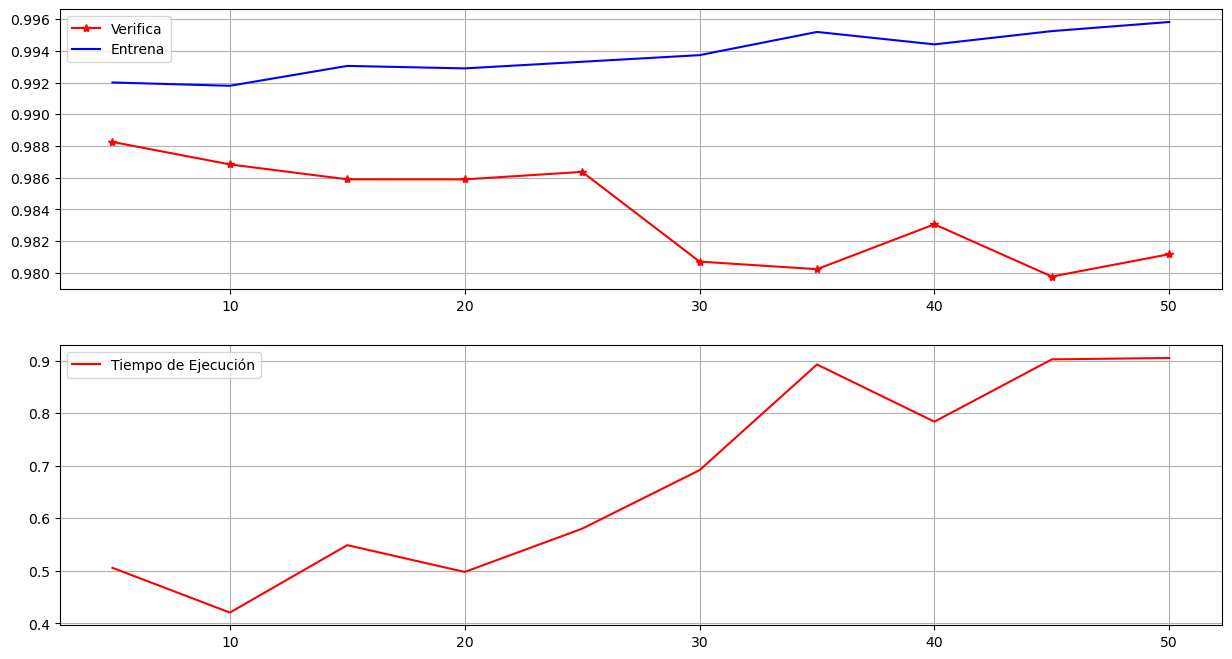

In [10]:
fig, ax = plt.subplots(2,1, figsize=(15,8))
ax[0].plot(range(5,51,5), resul.Verifica.values, 'r*-', label="Verifica")
ax[0].plot(range(5,51,5), resul.Entrena.values, 'b', label="Entrena")
ax[0].legend()
ax[0].grid()
ax[1].plot(range(5,51,5), resul['T_Ejecución'].values, 'r', label="Tiempo de Ejecución")
ax[1].legend()
ax[1].grid()